In [1]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(10000)
data.tail(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN
9999,2022-06-17 09:14:54,Impossible to use on lock screen anymore. Trie...,2,0,NaN


In [2]:
data.iloc[4,1]

"Dear Spotify ...  why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?"

In [3]:
data.isnull().sum()
       

Time_submitted       0
Review               0
Rating               0
Total_thumbsup       0
Reply             9979
dtype: int64

In [4]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

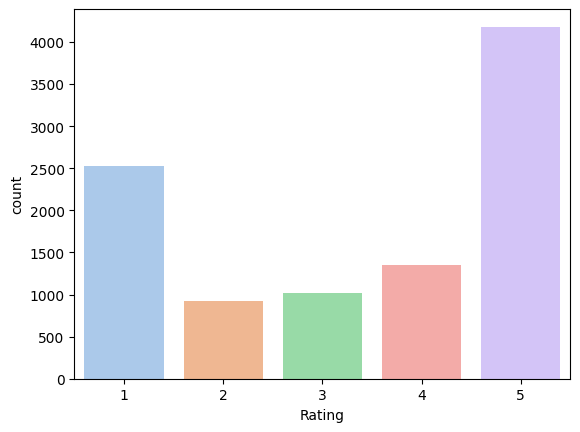

In [5]:
import seaborn as sns

sns.countplot(x='Rating', data=data, palette='pastel')

In [6]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


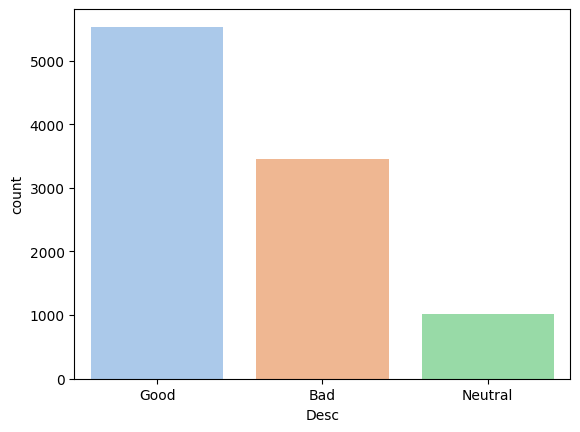

In [7]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()


<AxesSubplot: xlabel='length', ylabel='Total_thumbsup'>

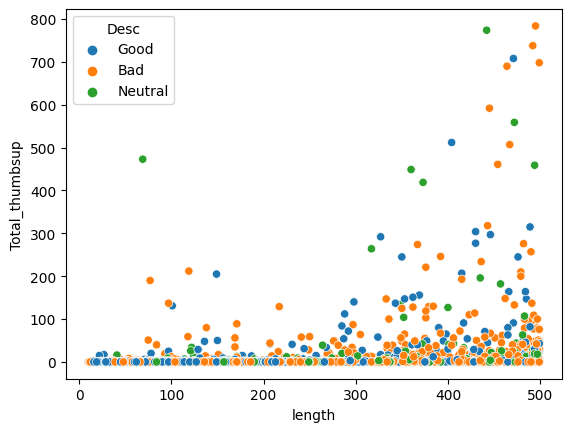

In [8]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 1500], hue=data['Desc'])


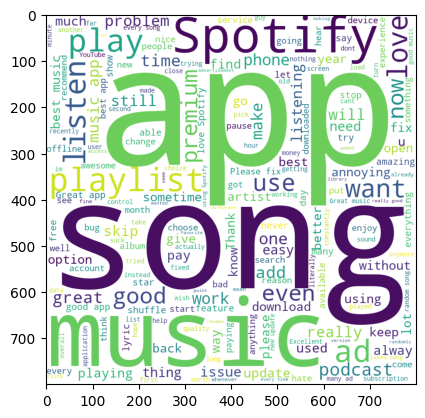

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(reviews)

plt.imshow(wordcloud) 


In [10]:
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()["Review"]

0    great music service, the audio is high quality...
1    please ignore previous negative rating. this a...
2    this pop-up "get the best spotify experience o...
3      really buggy and terrible to use as of recently
4    dear spotify ... why do i get songs that i did...
Name: Review, dtype: object

In [11]:
import re
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
data.head()["Review"]

0    great music service the audio is high quality ...
1    please ignore previous negative rating this ap...
2    this pop-up get the best spotify experience on...
3      really buggy and terrible to use as of recently
4    dear spotify  why do i get songs that i didnt ...
Name: Review, dtype: object

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
data.head()["Review"]

0    great music service audio high quality app eas...
1    please ignore previous negative rating app sup...
2    pop-up get best spotify experience android 12 ...
3                   really buggy terrible use recently
4    dear spotify get songs didnt put playlist shuf...
Name: Review, dtype: object

In [13]:
# from nltk.stem import WordNetLemmatizer
# lemmat = WordNetLemmatizer()
# data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
# data.head()["Review"]


from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))
data.head()["Review"]

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report



X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [15]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [16]:
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 299)	1
  (0, 2981)	1
  (0, 3289)	1
  (0, 3844)	1
  (0, 3859)	1
  (0, 4729)	1
  (0, 5539)	1
  (1, 529)	1
  (1, 1982)	1
  (1, 3101)	1
  (1, 3598)	1
  (1, 3768)	1
  (1, 4847)	1
  (2, 1786)	1
  (2, 1902)	1
  (2, 2307)	1
  (2, 3380)	1
  (3, 9)	1
  (3, 723)	1
  (3, 2273)	1
  (3, 2923)	1
  (3, 3006)	1
  (3, 3654)	1
  (3, 3767)	1
  (3, 3774)	1
  :	:
  (7497, 3465)	1
  (7497, 3570)	1
  (7497, 3573)	1
  (7497, 3611)	1
  (7497, 3938)	1
  (7497, 4014)	2
  (7497, 4149)	1
  (7497, 4582)	2
  (7497, 4714)	1
  (7497, 4767)	1
  (7497, 5131)	1
  (7497, 5290)	1
  (7497, 5329)	1
  (7497, 5539)	2
  (7497, 5664)	1
  (7497, 5734)	2
  (7497, 5767)	1
  (7497, 5801)	1
  (7497, 5870)	1
  (7498, 814)	1
  (7498, 3859)	1
  (7498, 4729)	1
  (7499, 682)	1
  (7499, 3907)	1
  (7499, 4916)	1


In [17]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 7348)	0.13998527728421514
  (0, 7345)	0.13882846041589678
  (0, 7265)	0.15116956916341734
  (0, 7236)	0.08970963096465402
  (0, 6790)	0.12453918940314032
  (0, 6785)	0.07765607498653049
  (0, 6283)	0.11686124253273503
  (0, 6256)	0.05746858476459464
  (0, 6194)	0.06821481618603226
  (0, 6179)	0.16004645753669275
  (0, 6178)	0.13236414529866256
  (0, 6151)	0.09399398697710191
  (0, 6140)	0.08175886831011395
  (0, 6033)	0.12852871083938028
  (0, 6032)	0.09765876418103521
  (0, 5962)	0.25456314376976424
  (0, 5933)	0.11127166967239097
  (0, 5472)	0.1968261581053942
  (0, 5470)	0.17557490491455607
  (0, 5172)	0.09343138821653749
  (0, 5162)	0.07034726621146428
  (0, 4794)	0.09202083072692055
  (0, 4793)	0.08652485117887716
  (0, 4559)	0.23304005324516164
  (0, 4547)	0.11998495411873808
  :	:
  (7499, 6194)	0.15457965891391554
  (7499, 5491)	0.19223630242388257
  (7499, 5488)	0.11126303887806895
  (7499, 5071)	0.19309546132643873
  (7499, 5067)	0.1283860115136349
  (7499, 4316)	0.1614

In [18]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7688


In [19]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')

Random Forest Classifier on TF-IDF Vectors: 0.7548


In [20]:
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'Multinomial Naive Bayes Classifier on Count Vectors: {mnb_cv}')

Multinomial Naive Bayes Classifier on Count Vectors: 0.7732


In [21]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'Multinomial Naive Bayes Classifier on TF-IDF Vectors: {mnb_tfidf}')

Multinomial Naive Bayes Classifier on TF-IDF Vectors: 0.7604


In [22]:
model = {'Model':['RandomForestClassifier-CountVectors', 
                  'RandomForestClassifier-TFIDFVectors', 
                  'MultinomialNBClassifier-CountVectors',
                  'MultinomialNBClassifier-TFIDFVectors'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RandomForestClassifier-CountVectors,0.7688
1,RandomForestClassifier-TFIDFVectors,0.7548
2,MultinomialNBClassifier-CountVectors,0.7732
3,MultinomialNBClassifier-TFIDFVectors,0.7604


<AxesSubplot: xlabel='Score', ylabel='Model'>

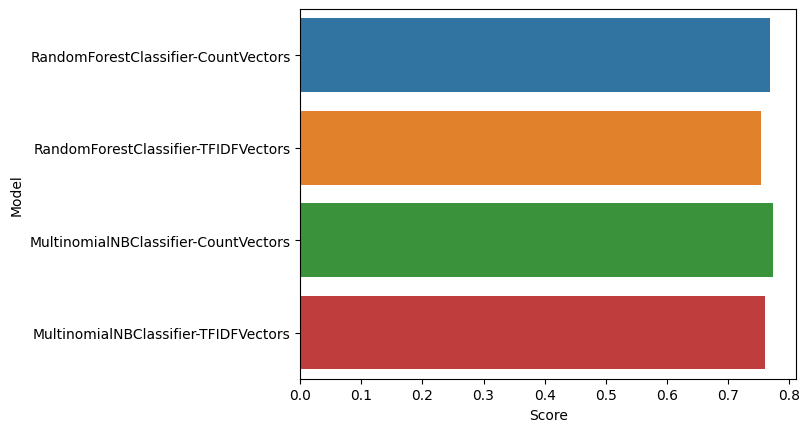

In [23]:
sns.barplot(data=model_df, y='Model', x='Score')


Text(0.5, 1.0, 'Confusion Matrix')

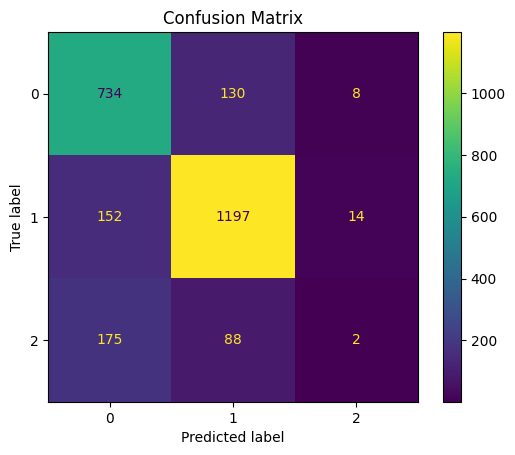

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)

disp.ax_.set_title("Confusion Matrix")

In [39]:
test_reviews = ['This is a great app!', 'so lagging', 'I like the song selection, but the ads are annoying', 'bad ui']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()


In [25]:

import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f)

# Save the transformer to a file
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)

# Save the le to a file
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [40]:
result = pd.DataFrame({'Reviews':test_reviews, 
                       'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,so lagging,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad
